Predicting Taxi-out delays
This notebook will focus purely on exploratory data analysis and linear regression modeling. This data was scraped under a Academic Paper under Review by IEEE transportation

In [63]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [64]:
df=pd.read_csv("M1_final.csv")
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [66]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [67]:
df.shape

(28820, 23)

In [68]:
df.columns.values

array(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'TAIL_NUM', 'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind', 'Wind Speed', 'Wind Gust', 'Pressure',
       'Condition', 'sch_dep', 'sch_arr', 'TAXI_OUT'], dtype=object)

In [69]:
df.isnull().sum()  ##the number of missing values in the dataset

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [70]:
df["Wind"].value_counts()


W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: Wind, dtype: int64

In [71]:
##Most common values for the Wind feature are W and NW. I filled the 2 missing values by using them both once

In [72]:
df["Wind"] = df["Wind"].fillna(value="W", limit=1)

df["Wind"] = df["Wind"].fillna(value="NW", limit=1)

In [73]:
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

no missing values left

In [74]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


As expected, DEP_DELAY has some extreme outliers since the max value is way more than the third quartile value. Mean departure delay is only 6 min but the standard deviation is 38.735 which is high.

In [75]:
df["OP_UNIQUE_CARRIER"].value_counts()

B6    9589
DL    7680
9E    4485
AA    3595
AS    1111
MQ    1045
YX     914
OO     311
HA      90
Name: OP_UNIQUE_CARRIER, dtype: int64

In [76]:
##dewpoint had onject data type though it is numeric value , thus Converting Dew Point which is an object dtype to an integer
df['Dew Point'].astype(str).astype(int)

0        34
1        34
2        34
3        34
4        32
         ..
28815    38
28816    38
28817    38
28818    38
28819    38
Name: Dew Point, Length: 28820, dtype: int32

In [77]:
df["Dew Point"].describe()

count     28820
unique       64
top          33
freq       1349
Name: Dew Point, dtype: object

EXPLORATORY DATA ANALYSIS 
CREATING BOXPLOT FOR DEP_DELAY

<AxesSubplot: >

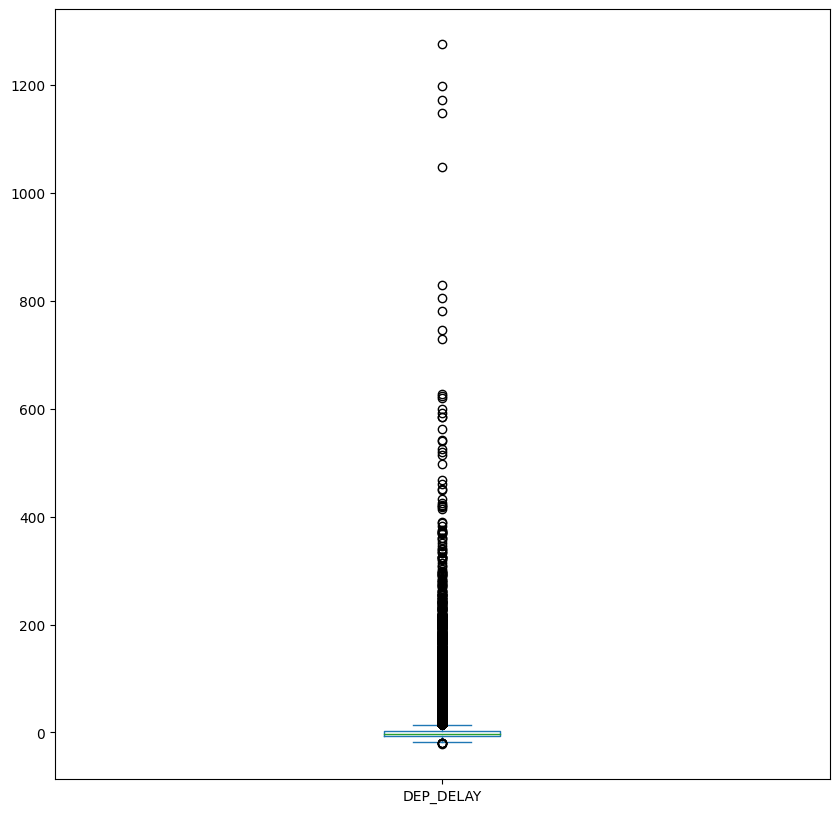

In [78]:
df['DEP_DELAY'].plot(kind="box", figsize=(10,10))

I would like to create 3 new feautures which are DELAYED, EARLY, and ONTIME. These columns will have values as 1 = yes and 0 = no

In [79]:
df['DELAYED'] = np.where(df['DEP_DELAY'] > 0, 1, 0)
df['EARLY'] = np.where(df['DEP_DELAY'] < 0, 1, 0)
df['ONTIME'] = np.where(df['DEP_DELAY'] == 0, 1, 0)

Adding a new feature to see total planned flights

In [80]:
early = df['EARLY'].sum()
delayed = df['DELAYED'].sum()
ontime = df['ONTIME'].sum()
total = df.shape[0]
p_early = early / total * 100
p_delayed = delayed / total * 100
p_ontime = ontime / total * 100

print("Flights are {0:.2f} percent ontime, {1:.2f} percent delayed and {2:.2f} percent early."
.format(p_ontime, p_delayed, p_early))

Flights are 5.09 percent ontime, 27.08 percent delayed and 67.83 percent early.


In [81]:
df["TOTAL_SCHEDULED"] = df["sch_dep"] + df["sch_arr"]
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAYED,EARLY,ONTIME,TOTAL_SCHEDULED
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,38,29.86,Fair / Windy,9,17,14,0,1,0,26
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,38,29.86,Fair / Windy,9,17,15,0,1,0,26
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,38,29.86,Fair / Windy,9,17,22,1,0,0,26
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,38,29.86,Fair / Windy,9,17,12,0,1,0,26
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,35,29.91,Fair / Windy,9,17,13,0,1,0,26


In [82]:
df["TOTAL_SCHEDULED"].value_counts(ascending = True)

2        2
9        2
18       3
8        4
17       4
      ... 
70    1156
67    1296
66    1328
64    1391
68    1494
Name: TOTAL_SCHEDULED, Length: 73, dtype: int64

Adding a new feature called AIRPORT_STATUS which uses the TOTAL_SCHEDULED values and labels them as 0,1 and 2 to show the status of the airport.
 Values between 0 and 20 are labeled as 0,
Values between 20 and 40 are labeled as 1,
Values between 40 and more are labeled as 2 showing that it is busy

In [83]:
df["AIRPORT_STATUS"] = pd.cut(df["TOTAL_SCHEDULED"], bins=[0,20,40,100],
                             include_lowest=True, labels = ["0","1","2"])

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAYED,EARLY,ONTIME,TOTAL_SCHEDULED,AIRPORT_STATUS
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,29.86,Fair / Windy,9,17,14,0,1,0,26,1
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,29.86,Fair / Windy,9,17,15,0,1,0,26,1
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,29.86,Fair / Windy,9,17,22,1,0,0,26,1
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,29.86,Fair / Windy,9,17,12,0,1,0,26,1
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,29.91,Fair / Windy,9,17,13,0,1,0,26,1


C:\Users\shazi\AppData\Local\Temp\ipykernel_12504\3845580355.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

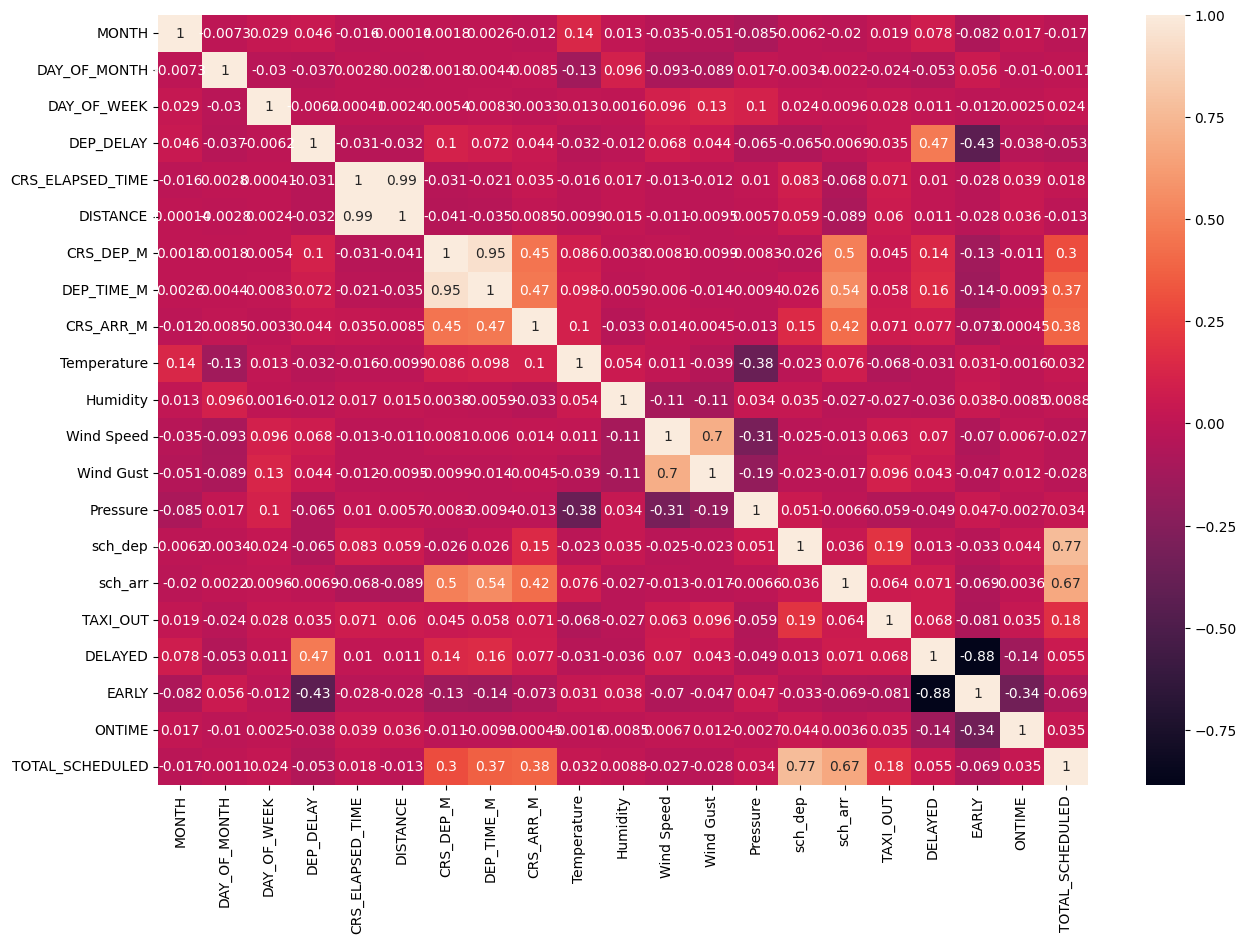

In [84]:
corr_matrix = df.corr()
corr_matrix
## heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

When the weather aspects and the relationships between the features are taken into account, the correlation results are as expected.

<AxesSubplot: ylabel='Condition'>

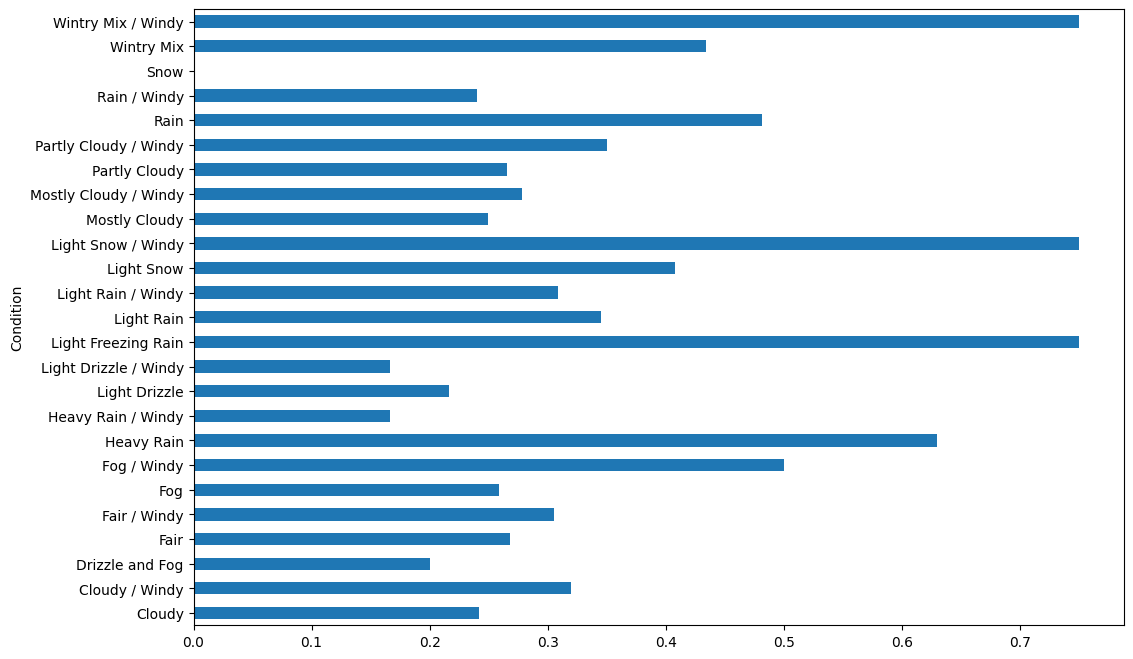

In [85]:
plt.figure(figsize=(12,8))
df.groupby('Condition')['DELAYED'].mean().plot(kind="barh")

From the graph above, we can see the probabilites of delays according to the weather conditions.

<AxesSubplot: ylabel='DELAYED'>

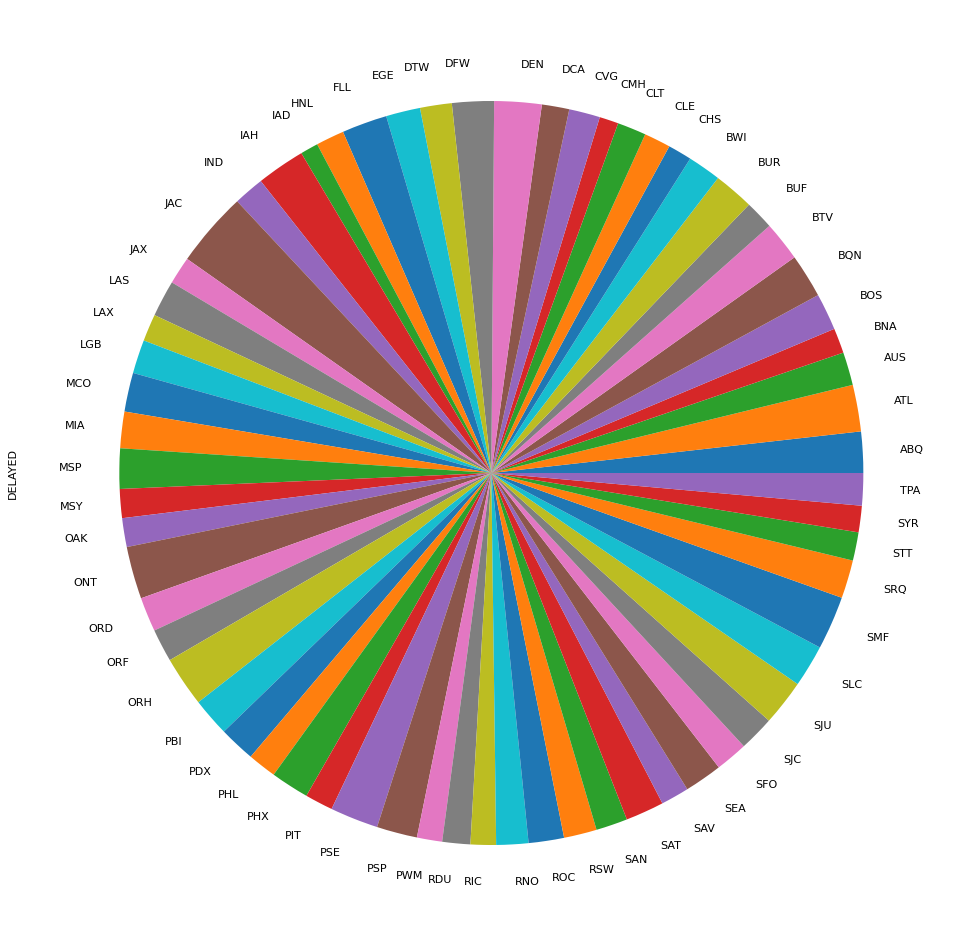

In [86]:
from matplotlib.pyplot import figure
figure(figsize=(15, 20), dpi=80)


df.groupby('DEST')['DELAYED'].mean().plot(kind="pie")

Flight that are flying to JAC has more probability to be delayed.

<AxesSubplot: xlabel='OP_UNIQUE_CARRIER'>

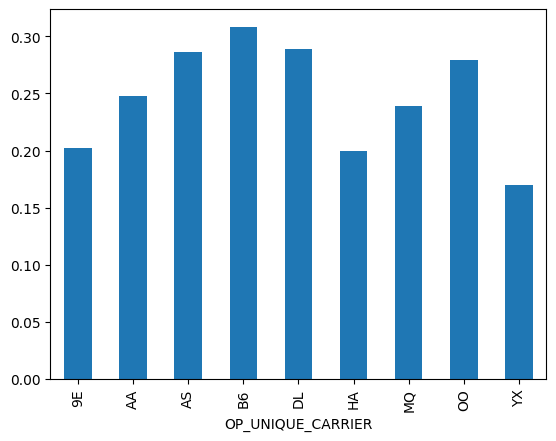

In [87]:
df.groupby('OP_UNIQUE_CARRIER')['DELAYED'].mean().plot(kind="bar")

Carriers have similar delay rates.We  can drop this column  since their delayed flight rates does not differ that much.

In [88]:
df.drop(["OP_UNIQUE_CARRIER"], axis=1, inplace=True)

Since DEP_DELAY is important and enough for us we can drop SCHEDULED DEPARTURE i.e CRS_DEP_M, ACTUAL_DEP_TIME i.e  "DEP_TIME_M", and SCHEDULED_ARRIVAL which is "CRS_ARR_M".
Wind Gust and Wind Speed are highly correlated so one can be dropped.
Dew Point is related to Humidity so it can be dropped as well.
We have used "sch_dep" and "sch_arr" to calculate TOTAL_SCHEDULED so we can drop them.
ONTIME and EARLY can be dropped as there are already DELAYED
Wind Speed and Pressure are negatively correlated and they represent similar things. Thus, Pressure can be dropped.

In [89]:
df.drop(["CRS_DEP_M"], axis=1, inplace=True)
df.drop(["DEP_TIME_M"], axis=1, inplace=True)
df.drop(["CRS_ARR_M"], axis=1, inplace=True)
df.drop(["TAIL_NUM"], axis=1, inplace=True)
df.drop(["Dew Point"], axis=1, inplace=True)
df.drop(["Wind Gust"], axis=1, inplace=True)
df.drop(["sch_dep"], axis=1, inplace=True)
df.drop(["sch_arr"], axis=1, inplace=True)
df.drop(["ONTIME"], axis=1, inplace=True)
df.drop(["EARLY"], axis=1, inplace=True)
df.drop(["Pressure"], axis=1, inplace=True)

In [90]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,Temperature,Humidity,Wind,Wind Speed,Condition,TAXI_OUT,DELAYED,TOTAL_SCHEDULED,AIRPORT_STATUS
0,11,1,5,CHS,-1,124,636,48,58,W,25,Fair / Windy,14,0,26,1
1,11,1,5,LAX,-7,371,2475,48,58,W,25,Fair / Windy,15,0,26,1
2,11,1,5,FLL,40,181,1069,48,58,W,25,Fair / Windy,22,1,26,1
3,11,1,5,MCO,-2,168,944,48,58,W,25,Fair / Windy,12,0,26,1
4,11,1,5,ATL,-4,139,760,46,58,W,24,Fair / Windy,13,0,26,1


In [91]:
df.shape

(28820, 16)

Creating features (X) and label (y)
Features are often referred to as "independent variables" and Label is often referred to as "dependent variable".
Here TAXI_OUT is our label because it depends on other features.

In [92]:
y = df['TAXI_OUT']    #other way y = df.iloc[:,15]   
X = df.drop(['TAXI_OUT'],axis = 1)

objects = list(X.select_dtypes(include = 'object').columns)
numerics = list(set(X.columns) - set(objects))

X = X.copy()


In [93]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
for i in objects:
    X[i] = label_encoder.fit_transform(X[i].astype(str))

Splitting the data in training and testing set
Training data set is used for fitting our model to learn the patterns.
Testing data set is used for prediction and unbiased evaluation of our final model
We can do this by using sklearn.model_selection.train_test_split.
Training data set - 80% of the total data Testing data set - 20% of the total data

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)  ### train, test and split my data

In [95]:
## STANDARD  SCALER
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LINEAR regression model and checking accuracy

In [119]:
model = LinearRegression()
fit2 = model.fit(X_train, y_train)
prediction = model.predict(X_test)


In [97]:
model.score(X_test, y_test)

0.06762335655306229

In [98]:
model.coef_

array([ 0.25850085, -0.23887794,  0.09824321,  0.41968344,  0.13931368,
        5.07388183, -4.77731658, -0.42475531, -0.07258055, -0.42837753,
        0.49421894,  0.2928245 ,  0.26463616,  1.22822184, -0.20761305])

In [99]:
## create a data frame for predictions
pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

,Actual,Predicted
21527,32,23.072473
21965,15,21.689970
10037,20,23.042357
7827,13,21.431382
18190,25,20.068257
...,...,...
6906,23,21.390315
11414,24,19.751985
16481,20,20.382663
8184,37,20.523872


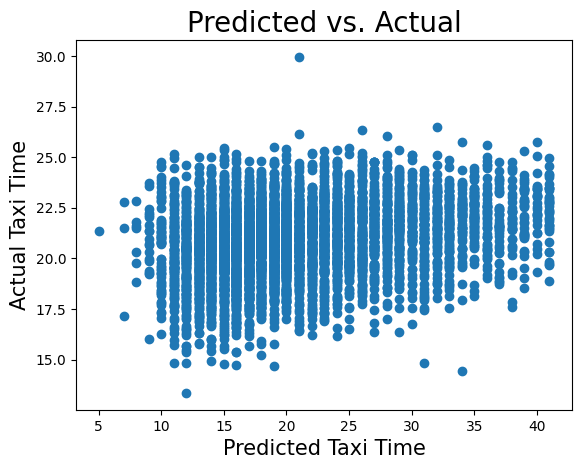

In [131]:
plt.scatter(y_test, prediction)
plt.title('Predicted vs. Actual', size=20)
plt.xlabel('Predicted Taxi Time', size=15)
plt.ylabel('Actual Taxi Time', size=15)
plt.show()

In [100]:
## MAE
##MSE
## RMSE
##R2

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2:', metrics.r2_score(y_test, prediction))

MAE: 5.286969461804031
MSE: 43.94762026491204
RMSE: 6.629300133868736
R2: 0.06762335655306229


In [101]:
## Lasso Regression
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [102]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_lasso})

,Actual,Predicted
21527,32,21.032781
21965,15,21.014179
10037,20,21.069984
7827,13,20.995577
18190,25,20.642145
...,...,...
6906,23,21.088586
11414,24,20.511933
16481,20,20.939772
8184,37,21.088586


In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 5.478280522321844
MSE: 46.554319977492916
RMSE: 6.823072619977961
R2: 0.01232056851039065


In [104]:
## random foresst regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=32)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=32)

In [105]:
rf_reg_pred = rf_reg.predict(X_test)

In [106]:
pd.DataFrame({'Actual': y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
21527,32,25.72
21965,15,20.85
10037,20,27.06
7827,13,22.49
18190,25,19.85
...,...,...
6906,23,22.70
11414,24,18.63
16481,20,20.18
8184,37,18.90


In [107]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 4.687303868841083
MSE: 35.74499400420715
RMSE: 5.978711734496584
R2: 0.24164727626258709


In [108]:
## Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)


mul_reg = LinearRegression()
mul_reg.fit(X_train_2, y_train)

LinearRegression()

In [109]:
mul_pred = mul_reg.predict(X_test_2)
pd.DataFrame({'Actual': y_test, 'Predicted': mul_pred})

,Actual,Predicted
21527,32,22.775738
21965,15,21.341498
10037,20,23.444527
7827,13,21.173034
18190,25,19.891341
...,...,...
6906,23,21.433291
11414,24,19.056296
16481,20,21.077883
8184,37,20.580058


In [110]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 5.193880722474754
MSE: 42.186164377778866
RMSE: 6.495087711322986
R2: 0.10499376063240062


In [111]:
## ridge regression
model_ridge = Ridge(alpha=0.99, random_state= 32)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.99, random_state=32)

In [112]:
## make predictions
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})

,Actual,Predicted
21527,32,23.068859
21965,15,21.687235
10037,20,23.044248
7827,13,21.434275
18190,25,20.064342
...,...,...
6906,23,21.387087
11414,24,19.751561
16481,20,20.379234
8184,37,20.528045


In [113]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 5.286884572336898
MSE: 43.94611207813398
RMSE: 6.629186381309095
R2: 0.06765535369232378
